In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import display
import pandas as pd
import numpy as np

## Step1

In [1]:
money = float(input("請輸入您的戶頭金額: "))
print("若以臺灣銀行一年期定存利率1.065%計算, 一年後您將獲得:",money*0.01065,"元")

請輸入您的戶頭金額: 12345678
若以臺灣銀行一年期定存利率1.065%計算, 一年後您將獲得: 131481.4707 元


In [3]:
I = money*0.01065 #I即為利息
print(I)

13148.13855


## Step2

## [參考資料：如何爬選擇權即時報價](http://yvictor.logdown.com/posts/996770)

In [4]:
driver = webdriver.PhantomJS()

In [5]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx')

In [6]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,商品,狀態,買價,買量,賣價,賣量,成交價,漲跌,振幅％,成交量,開盤,最高,最低,參考價,時間
8,金融期028,NaN,1206.00,2,1206.80,5,1206.40,2.20,0.58,50,1207.60,1207.60,1200.60,1204.20,10:55:07
9,金融期038,NaN,1206.20,1,1207.60,1,--,--,--,--,NaN,NaN,NaN,1206.00,NaN
10,金融期068,NaN,1200.60,1,1215.60,1,--,--,--,--,NaN,NaN,NaN,1195.00,NaN
11,金融期098,NaN,1165.60,1,1183.60,1,--,--,--,--,NaN,NaN,NaN,1166.00,NaN
12,電子現貨,NaN,NaN,--,NaN,--,451.45,1.24,0.81,--,452.57,453.52,449.86,450.21,11:00:35
13,電子期018,NaN,450.95,1,451.00,2,450.95,1.25,0.76,2332,452.20,452.30,448.90,449.70,11:00:24
14,電子期028,NaN,450.25,1,450.45,2,450.15,1.15,0.66,86,451.25,451.40,448.45,449.00,10:55:07
15,電子期038,NaN,449.20,5,452.00,3,--,--,--,--,NaN,NaN,NaN,448.50,NaN
16,電子期068,NaN,446.10,1,448.45,1,--,--,--,--,NaN,NaN,NaN,445.75,NaN
17,電子期098,NaN,428.15,1,437.55,1,--,--,--,--,NaN,NaN,NaN,431.60,NaN


In [7]:
driver.get('http://info512.taifex.com.tw/Future/OptQuote_Norl.aspx')

In [8]:
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,268.0,274.0,261.000,6.000,5,10:32:41,10550,1.9,2.1,2.000,-2.800,14520,11:00:47
9,221.0,226.0,200.000,-7.000,77,10:11:39,10600,3.9,4.1,4.000,-3.700,9073,11:00:35
10,175.0,178.0,171.000,9.000,335,10:54:49,10650,7.5,7.7,7.400,-5.600,10060,11:00:42
11,132.0,134.0,133.000,13.000,3224,11:00:45,10700,13.5,14.5,14.000,-6.000,13598,11:00:06
12,93.0,94.0,94.000,12.000,11711,11:00:49,10750,24.5,25.0,24.500,-10.000,19290,11:00:45
13,60.0,61.0,61.000,8.000,36062,11:00:35,10800,41.5,42.5,41.500,-12.500,28604,11:00:45
14,34.5,35.0,34.500,4.500,29712,11:00:49,10850,65.0,67.0,66.000,-17.000,12593,11:00:51
15,17.0,18.0,18.000,2.500,22700,11:00:48,10900,98.0,100.0,99.000,-18.000,4410,11:00:31
16,7.7,7.9,7.800,0.700,17360,11:00:35,10950,138.0,140.0,139.000,-22.000,1178,11:00:30
17,3.0,3.1,3.200,0.400,7652,11:00:06,11000,181.0,186.0,185.000,-20.000,80,10:51:59


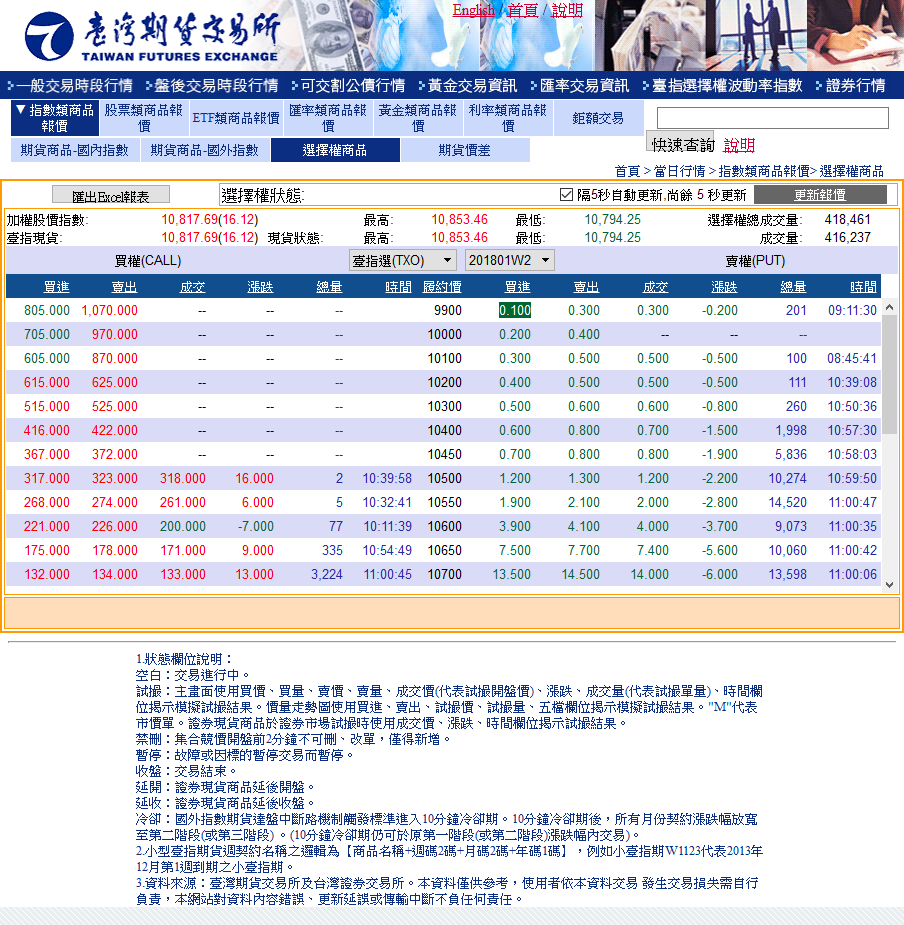

In [9]:
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

In [10]:
#換頁
selectbox = webdriver.support.ui.Select(driver.find_element_by_name('ctl00$ContentPlaceHolder1$ddlFusa_SelMon'))
selectbox.all_selected_options
[sel.text for sel in selectbox.options]
selectbox.select_by_value([sel.text for sel in selectbox.options][3])

In [11]:
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,268.0,274.0,261.000,6.000,5,10:32:41,10550,1.9,2.1,2.000,-2.800,14520,11:00:47
9,221.0,226.0,200.000,-7.000,77,10:11:39,10600,3.9,4.1,4.000,-3.700,9073,11:00:35
10,175.0,178.0,171.000,9.000,335,10:54:49,10650,7.5,7.7,7.400,-5.600,10060,11:00:42
11,132.0,134.0,133.000,13.000,3224,11:00:45,10700,13.5,14.5,14.000,-6.000,13598,11:00:06
12,93.0,94.0,94.000,12.000,11711,11:00:49,10750,24.5,25.0,24.500,-10.000,19290,11:00:45
13,60.0,61.0,61.000,8.000,36062,11:00:35,10800,41.5,42.5,41.500,-12.500,28604,11:00:45
14,34.5,35.0,34.500,4.500,29712,11:00:49,10850,65.0,67.0,66.000,-17.000,12593,11:00:51
15,17.0,18.0,18.000,2.500,22700,11:00:48,10900,98.0,100.0,99.000,-18.000,4410,11:00:31
16,7.7,7.9,7.800,0.700,17360,11:00:35,10950,138.0,140.0,139.000,-22.000,1178,11:00:30
17,3.0,3.1,3.200,0.400,7652,11:00:06,11000,181.0,186.0,185.000,-20.000,80,10:51:59


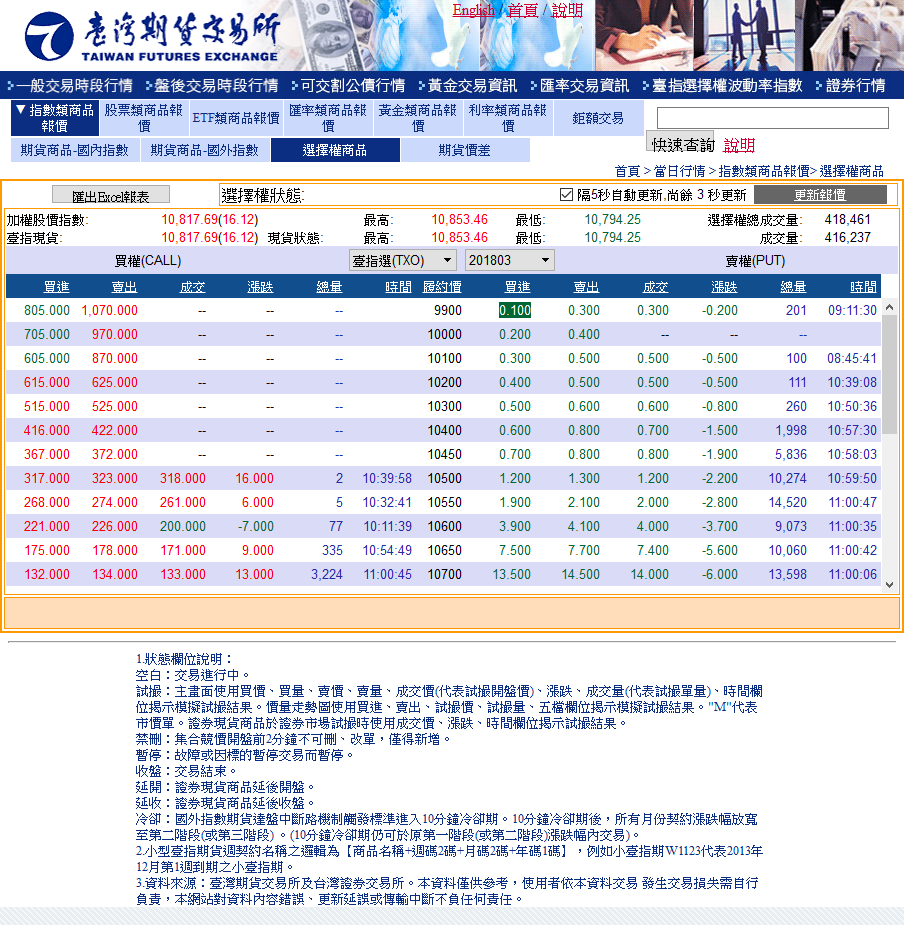

In [12]:
#利用截圖功能確認是否換頁成功
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

In [13]:
#將Call資料與Put資料分別放到兩個dataframe裡面
soup = BeautifulSoup(driver.page_source,"lxml")
table = pd.read_html(str(soup.select('#divDG')[0]))[0]
Call = table.loc[:,:6]
Put = table.loc[:,6:]
Call.columns = Call.loc[0]
Call = Call[1:]
Put.columns = Put.loc[0]
Put = Put[1:]
display(Call.loc[15:20],Put.loc[15:20])

,買進,賣出,成交,漲跌,總量,時間,履約價
15,34.500,35.000,34.500,4.500,29712,11:00:49,10850
16,17.000,18.000,18.000,2.500,22700,11:00:48,10900
17,7.700,7.900,7.800,0.700,17360,11:00:35,10950
18,3.000,3.100,3.200,0.400,7652,11:00:06,11000
19,0.900,1.000,1.000,-0.400,6171,11:00:36,11050
20,0.200,0.400,0.300,-0.400,6685,10:58:03,11100


,履約價,買進,賣出,成交,漲跌,總量,時間
15,10850,65.000,67.000,66.000,-17.000,12593,11:00:51
16,10900,98.000,100.000,99.000,-18.000,4410,11:00:31
17,10950,138.000,140.000,139.000,-22.000,1178,11:00:30
18,11000,181.000,186.000,185.000,-20.000,80,10:51:59
19,11050,229.000,234.000,264.000,15.000,3,10:07:01
20,11100,278.000,285.000,--,--,--,NaN


In [14]:
def Vol_conversion(input_ele):
    if input_ele == '--':
        return 0
    if input_ele!= '--':
        return int(''.join(input_ele.split(',')))
def mon_float(input_ele):
    if input_ele == '--':
        return None
    if input_ele!= '--':
        return float(''.join(input_ele.split(',')))

In [15]:
display(Call.head(3))
Call['總量'] = Call['總量'].map(Vol_conversion)
Put['總量'] = Put['總量'].map(Vol_conversion)
Call['成交'] = Call['成交'].map(mon_float)
Put['成交'] = Put['成交'].map(mon_float)
Call['履約價']=Call['履約價'].map(lambda x:int(x))
Put['履約價']=Put['履約價'].map(lambda x:int(x))
display(Call.head(3))

,買進,賣出,成交,漲跌,總量,時間,履約價
1,805.000,1070.000,--,--,--,NaN,9900
2,705.000,970.000,--,--,--,NaN,10000
3,605.000,870.000,--,--,--,NaN,10100


,買進,賣出,成交,漲跌,總量,時間,履約價
1,805.000,1070.000,NaN,--,0,NaN,9900
2,705.000,970.000,NaN,--,0,NaN,10000
3,605.000,870.000,NaN,--,0,NaN,10100


In [16]:
comp = np.array(Call['履約價'].tolist())+np.array(Call['成交'].tolist())-np.array(Put['成交'].tolist())
Call['組合價'] = pd.Series(comp,index=[Call.index])
Put['組合價'] = pd.Series(comp,index=[Put.index])
pd.Series(comp,index=[Call.index])

1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8     10816.8
9     10809.0
10    10796.0
11    10813.6
12    10819.0
13    10819.5
14    10819.5
15    10818.5
16    10819.0
17    10818.8
18    10818.2
19    10787.0
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
dtype: float64

In [17]:
def EV(Spot_price,Strike_price):
    if Spot_price-Strike_price>0:
        return Spot_price-Strike_price
    else:
        return 0

In [18]:
Call['內含價值'] = Call.apply(lambda row: EV(row['組合價'],row['履約價']),axis=1)
Put['內含價值'] = Put.apply(lambda row: EV(row['組合價'],row['履約價']),axis=1)
display(Call.loc[16:19],Put.loc[16:19])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值
16,17.000,18.000,18.0,2.500,22700,11:00:48,10900,10819.0,0.0
17,7.700,7.900,7.8,0.700,17360,11:00:35,10950,10818.8,0.0
18,3.000,3.100,3.2,0.400,7652,11:00:06,11000,10818.2,0.0
19,0.900,1.000,1.0,-0.400,6171,11:00:36,11050,10787.0,0.0


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值
16,10900,98.000,100.000,99.0,-18.000,4410,11:00:31,10819.0,0.0
17,10950,138.000,140.000,139.0,-22.000,1178,11:00:30,10818.8,0.0
18,11000,181.000,186.000,185.0,-20.000,80,10:51:59,10818.2,0.0
19,11050,229.000,234.000,264.0,15.000,3,10:07:01,10787.0,0.0


In [19]:
Call['時間價值'] = Call.apply(lambda row: row['成交']-row['內含價值'] if row['成交']!= 0 else 0,axis=1)
Put['時間價值'] = Put.apply(lambda row: row['成交']-row['內含價值'] if row['成交']!= 0 else 0,axis=1)
display(Call.loc[10:20],Put.loc[10:20])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值,時間價值
10,221.000,226.000,200.0,-7.000,77,10:11:39,10600,10796.0,196.0,4.0
11,175.000,178.000,171.0,9.000,335,10:54:49,10650,10813.6,163.6,7.4
12,132.000,134.000,133.0,13.000,3224,11:00:45,10700,10819.0,119.0,14.0
13,93.000,94.000,94.0,12.000,11711,11:00:49,10750,10819.5,69.5,24.5
14,60.000,61.000,61.0,8.000,36062,11:00:35,10800,10819.5,19.5,41.5
15,34.500,35.000,34.5,4.500,29712,11:00:49,10850,10818.5,0.0,34.5
16,17.000,18.000,18.0,2.500,22700,11:00:48,10900,10819.0,0.0,18.0
17,7.700,7.900,7.8,0.700,17360,11:00:35,10950,10818.8,0.0,7.8
18,3.000,3.100,3.2,0.400,7652,11:00:06,11000,10818.2,0.0,3.2
19,0.900,1.000,1.0,-0.400,6171,11:00:36,11050,10787.0,0.0,1.0


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值,時間價值
10,10600,3.900,4.100,4.0,-3.700,9073,11:00:35,10796.0,196.0,-192.0
11,10650,7.500,7.700,7.4,-5.600,10060,11:00:42,10813.6,163.6,-156.2
12,10700,13.500,14.500,14.0,-6.000,13598,11:00:06,10819.0,119.0,-105.0
13,10750,24.500,25.000,24.5,-10.000,19290,11:00:45,10819.5,69.5,-45.0
14,10800,41.500,42.500,41.5,-12.500,28604,11:00:45,10819.5,19.5,22.0
15,10850,65.000,67.000,66.0,-17.000,12593,11:00:51,10818.5,0.0,66.0
16,10900,98.000,100.000,99.0,-18.000,4410,11:00:31,10819.0,0.0,99.0
17,10950,138.000,140.000,139.0,-22.000,1178,11:00:30,10818.8,0.0,139.0
18,11000,181.000,186.000,185.0,-20.000,80,10:51:59,10818.2,0.0,185.0
19,11050,229.000,234.000,264.0,15.000,3,10:07:01,10787.0,0.0,264.0


## 保證金算法

In [20]:
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx?d=080585')

In [21]:
#先抓出現貨價格
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

,商品,狀態,買價,買量,賣價,賣量,成交價,漲跌,振幅％,成交量,開盤,最高,最低,參考價,時間
0,臺指現貨,NaN,NaN,--,NaN,--,10813.84,12.27,0.55,--,10834.58,10853.46,10794.25,10801.57,11:01:00


In [22]:
Spot_information = pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

In [23]:
#給定期交所上的保證金A值以及B值
#賣出買權/賣出CALL : 權利金市值+MAXIMUM(A值-價外值，B值)
#賣出賣權/賣出PUT : 權利金市值+MAXIMUM(A值-價外值，B值)
A = 22000
B = 11000
S = float(Spot_information['成交價'])
spread1 = S-Call['履約價']
spread2 = Put['履約價']-S

In [24]:
Call["價外值"]=np.nan
for i in range(1,len(Call)):
    if spread1[i] > 0:
        Call["價外值"][i] = spread1[i] 
    else:
        Call["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
Call['保證金']=np.nan
for i in range (1,len(Call)):
    Call['保證金'][i] = Call['成交'][i]*50 + max(A-Call["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
Put["價外值"]=np.nan
for i in range(1,len(Put)):
    if spread2[i] > 0:
        Put["價外值"][i] = spread2[i] 
    else:
        Put["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
Put['保證金']=np.nan
for i in range (1,len(Put)):
    Put['保證金'][i] = Put['成交'][i]*50 + max(A-Put["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#看看價平附近Call跟Put情況如何
display(Call.loc[15:25],Put.loc[15:25])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值,時間價值,價外值,保證金
15,34.500,35.000,34.5,4.500,29712,11:00:49,10850,10818.5,0.0,34.5,0.0,23725.0
16,17.000,18.000,18.0,2.500,22700,11:00:48,10900,10819.0,0.0,18.0,0.0,22900.0
17,7.700,7.900,7.8,0.700,17360,11:00:35,10950,10818.8,0.0,7.8,0.0,22390.0
18,3.000,3.100,3.2,0.400,7652,11:00:06,11000,10818.2,0.0,3.2,0.0,22160.0
19,0.900,1.000,1.0,-0.400,6171,11:00:36,11050,10787.0,0.0,1.0,0.0,22050.0
20,0.200,0.400,0.3,-0.400,6685,10:58:03,11100,NaN,0.0,0.3,0.0,22015.0
21,0.100,0.200,0.3,-0.300,1753,09:34:23,11200,NaN,0.0,0.3,0.0,22015.0
22,0.100,0.200,0.2,0.100,1,08:54:45,11300,NaN,0.0,0.2,0.0,22010.0
23,0.100,0.200,NaN,--,0,NaN,11400,NaN,0.0,NaN,0.0,NaN
24,0.100,0.200,NaN,--,0,NaN,11500,NaN,0.0,NaN,0.0,NaN


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值,時間價值,價外值,保證金
15,10850,65.000,67.000,66.0,-17.000,12593,11:00:51,10818.5,0.0,66.0,36.16,25263.84
16,10900,98.000,100.000,99.0,-18.000,4410,11:00:31,10819.0,0.0,99.0,86.16,26863.84
17,10950,138.000,140.000,139.0,-22.000,1178,11:00:30,10818.8,0.0,139.0,136.16,28813.84
18,11000,181.000,186.000,185.0,-20.000,80,10:51:59,10818.2,0.0,185.0,186.16,31063.84
19,11050,229.000,234.000,264.0,15.000,3,10:07:01,10787.0,0.0,264.0,236.16,34963.84
20,11100,278.000,285.000,NaN,--,0,NaN,NaN,0.0,NaN,286.16,NaN
21,11200,378.000,384.000,NaN,--,0,NaN,NaN,0.0,NaN,386.16,NaN
22,11300,477.000,485.000,NaN,--,0,NaN,NaN,0.0,NaN,486.16,NaN
23,11400,575.000,585.000,NaN,--,0,NaN,NaN,0.0,NaN,586.16,NaN
24,11500,675.000,685.000,NaN,--,0,NaN,NaN,0.0,NaN,686.16,NaN


## 如何計算價平

In [29]:
at_the_money = Call['履約價'] + Call['成交'] - Put['成交']

In [30]:
df = pd.concat([at_the_money,Call['履約價'],Call['成交'],Call['保證金'],Put['履約價'],Put['成交'],Put['保證金']],axis = 1)
display(df[9:20])

,0,履約價,成交,保證金,履約價,成交,保證金
10,10796.0,10600,200.0,31786.16,10600,4.0,22200.00
11,10813.6,10650,171.0,30386.16,10650,7.4,22370.00
12,10819.0,10700,133.0,28536.16,10700,14.0,22700.00
13,10819.5,10750,94.0,26636.16,10750,24.5,23225.00
14,10819.5,10800,61.0,25036.16,10800,41.5,24075.00
15,10818.5,10850,34.5,23725.00,10850,66.0,25263.84
16,10819.0,10900,18.0,22900.00,10900,99.0,26863.84
17,10818.8,10950,7.8,22390.00,10950,139.0,28813.84
18,10818.2,11000,3.2,22160.00,11000,185.0,31063.84
19,10787.0,11050,1.0,22050.00,11050,264.0,34963.84
